In [62]:
import timeatlas as ta
import pandas as pd

## Grammar

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

---
# Univariate Prediction

To create a univariate prediction, let's populate a time series with weather data.

In [63]:
# Data Loading
my_series = pd.read_csv("../data/bbdata-weather/4652.csv")
my_series = pd.DataFrame(data=my_series["value"].values, 
                         index=pd.to_datetime(my_series["timestamp"]).values)
my_series.index = my_series.index.round("S")

In [64]:
# Create TimeSeries
ts = ta.TimeSeries(my_series)["2018-01-01":"2018-06-01"]

In [65]:
ts = ts.resample("min", method="pad").group_by("min")

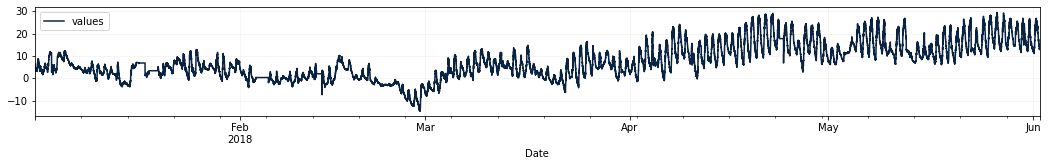

In [66]:
ts.plot()

In [67]:
## Model Creation
m = ta.models.Prophet()

In [68]:
## Fit the univariate time series
m.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


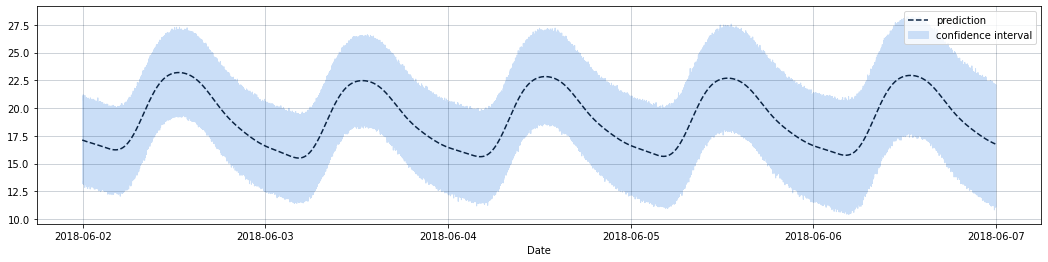

In [72]:
# Predict 5 days after the data's last time stamp
Y_hat = m.predict('5 days')
Y_hat.plot()

## Multivariate Prediction

To create a multivariate prediction, let's populate a time series dataset with a temperature and luminosity values.

In [73]:
# Temperature
ts_1 = pd.read_csv("../data/bbdata-weather/4652.csv")
ts_1 = pd.DataFrame(data=ts_1["value"].values, 
                         index=pd.to_datetime(ts_1["timestamp"]).values)
ts_1.index = ts_1.index.round("S")
ts_1 = ta.TimeSeries(ts_1)

# Luminosity
ts_2 = pd.read_csv("../data/bbdata-weather/4914.csv")
ts_2 = pd.DataFrame(data=ts_2["value"].values, 
                         index=pd.to_datetime(ts_2["timestamp"]).values)
ts_2.index = ts_2.index.round("S")
ts_2 = ta.TimeSeries(ts_2)

# Create the TSD
tsd = ta.TimeSeriesDataset([ts_1, ts_2])

Preprocess data so that it is clean and full

In [74]:
tsd = tsd.resample("min", method="pad").group_by("min").regularize("][")

Select a data subset

In [75]:
tsd = tsd["2017-01":"2017-03"]

Split in train/test set

In [76]:
X_train, X_test = tsd.split_at("2017-02-28")

Create and fit models

In [77]:
m = ta.models.Prophet()

In [78]:
m.fit(X_train, 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Predict the values with the test set

In [82]:
ts = m.predict(X_test)

See the prediction

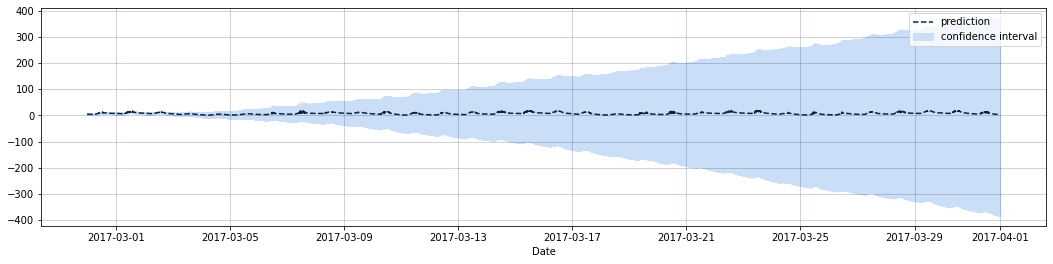

In [83]:
ts.plot()

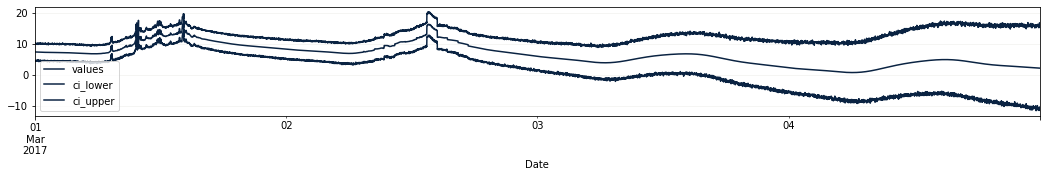

In [84]:
ts["2017-03-01":"2017-03-04"].plot()

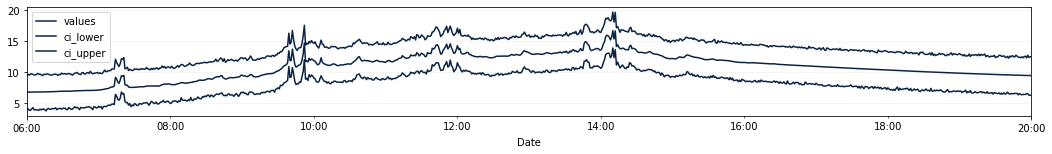

In [85]:
ts["2017-03-01 06:00":"2017-03-01 20:00"].plot()